Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

Age	Wing Length
3	1.4
4	1.5
5	2.2
6	2.4
7	3.1
8	3.2
9	3.2
11	3.9
12	4.1
14	4.7
15	4.5
16	5.2
17	5.0

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

1. Plot the relationship between Age and Wing Length.
2. Calculate and plot the regression line.

The slope and intercept of the regression line are 0.2647 and 0.8296, respectively.


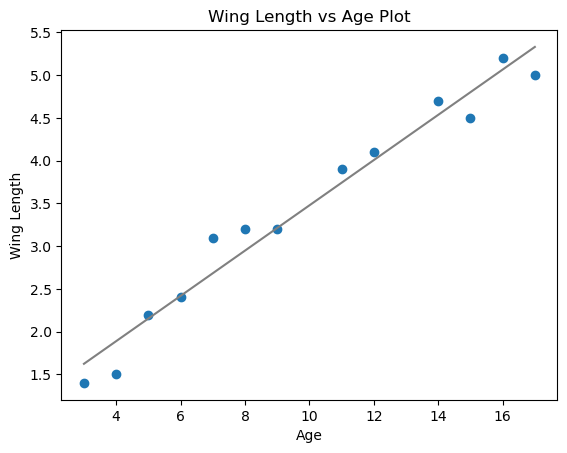

In [7]:
age = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
wing_length = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

#Plot age vs wing length as scatter plot
plt.scatter(age, wing_length)
plt.xlabel ("Age")
plt.ylabel ("Wing Length")
plt.title("Wing Length vs Age Plot")
plt.show

#Calculate the coefficients of linear regression
slope, intercept = np.polyfit(age, wing_length, 1)  #1 represents degree of polynomial

#Convert age to numpy array
age_array = np.array(age)

for x in age:
    regression_line = slope * age_array + intercept

plt.plot(age, regression_line, color="grey", label = "Regression Line")
plt.show

print(f"The slope and intercept of the regression line are {slope:.4f} and {intercept:.4f}, respectively.")

3. Can you reject H0: b = 0?

In [14]:
# Create a DataFrame
data = pd.DataFrame({'age': age, 'wing_length': wing_length})

# Fit the linear regression model
model = smf.ols('wing_length ~ age', data=data).fit()

# Print the summary of the regression model
print(model.summary())

# Check the p-value for the slope (coefficient of 'age')
p_value = model.pvalues['age']
print(f"P-value for the coefficient of 'age': {p_value:.4f}")

# Set significance level
alpha = 0.05

# Decision
if p_value < alpha:
    print("Reject H0: The coefficient is significantly different from zero.")
else:
    print("Fail to reject H0: The coefficient is not significantly different from zero.")

                            OLS Regression Results                            
Dep. Variable:            wing_length   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.01e-09
Time:                        07:51:50   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8296      0.168      4.946      0.0

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


4. Calculate and plot the confidence intervals on the slope of the regression.

In [9]:
# Get the confidence intervals for the coefficients
conf_intervals = model.conf_int(alpha=0.05)  # 95% confidence intervals
print("Confidence Intervals for coefficients:\n", conf_intervals)

Confidence Intervals for coefficients:
                   0         1
Intercept  0.460429  1.198819
age        0.230439  0.298929


4. Calculate r2 (the coefficient of determination).

In [18]:
#Access the R-squared value
r_squared = model.rsquared
print("The R2 of the regression model is 0.963.")

The R2 of the regression model is 0.963.


6. Calculate Pearson's r.

In [21]:
r, p_value = pearsonr(age, wing_length)

print(f"Pearson's r: {r:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson's r: 0.9815
P-value: 0.0000


7. Add some noise to the data and see how the regression changes.

In [27]:
#Convert Wing Length into an array
wing_length_array = np.array(wing_length)

# Add noise to the wing_length data
noise = np.random.normal(0, 0.5, size=wing_length_array.shape)  # Mean 0, StdDev 0.5
wing_length_noisy = wing_length_array + noise

# Create a DataFrame with noisy data
data_noisy = pd.DataFrame({'age': age, 'wing_length_noisy': wing_length_noisy})

# Fit the linear regression model with noisy data
model_noisy = smf.ols('wing_length_noisy ~ age', data=data_noisy).fit()

# Print the summary of the regression model with noisy data
print(model_noisy.summary())

r_squared_noisy = model_noisy.rsquared

print("Adding noise changes the R-squared value to {r_squared_noisy}.")

                            OLS Regression Results                            
Dep. Variable:      wing_length_noisy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     95.15
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           9.47e-07
Time:                        07:58:22   Log-Likelihood:                -8.1794
No. Observations:                  13   AIC:                             20.36
Df Residuals:                      11   BIC:                             21.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5119      0.324      1.582      0.1

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)
